# Spotify 

## About the Data

### Our Spotify dataset

The data that we will use for this project was extracted from Spotify through its dedicated [Web API](https://developer.spotify.com). However we used [Spotipy](https://spotipy.readthedocs.io/en/master/), which is a Python library, to interact with the API directly. 

Two datasets were initially extracted from the data collection process (*detailed below*). But these datasets were merged to form a single dataset that contains both the basic information of individual songs/tracks and their respective audio features. 

Essentially, the Spotify dataset is, more or less, a compilation of songs with their attached quantitative features describing the audio qualities of each song.

Below is a table summarizing the features that can be found in the dataset with its equivalent descriptions:

| column | type | dtype | description* |
|--------|-------|----|----------|
| song title | nominal | str | The track's title. |
| artist name | nominal | str | The name of artist of the specific track. |
| release date | ordinal | datetime | The date the album was first released. |
| duration | **continuous** | int | The track length in milliseconds. |
| popularity | **continuous** | int | The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks. |
| uri | nominal | str | The Spotify URI for the track. Foreign key of the dataset |
| danceability | **continuous** | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | **continuous** | float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| key | ordinal | int | The key the track is in. Integers map to pitches using standard Pitch Class notation. |
| loudness | **continuous** | float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. |
| mode | nominal | int | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. |
| speechiness | **continuous** | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| acousticness | **continuous** | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| instrumentalness | **continuous** | float | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | **continuous** | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| valence | **continuous** | float | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | **continuous** | float | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| time signature | ordinal | int | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |

*Descriptions of each feature is taken from the Spotify Web API [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)** 

### Data collection with the Spotify Web API & Spotipy Python package 
- Provide the description of the collection process executed to build the dataset. Discuss any implications of the data collection method.

Our approach to collecting data from Spotify was a two-fold process that began with extracting tracks from a list of playlist and afterwards retrieving the audio features of these tracks.

To get a better grasp of our data collection process, you can check out our [GitHub repo](https://github.com/dapniii/DATA102-Spotify-Recommendation-System) where we have uploaded the two Python scripts (*track_extractor.py & audio_feature_extractor.py*) that we have used to implement this. 

#### Extracting tracks from playlists
Initially, we have opted to only collect tracks from the two longest playlists available on Spotify: [The Longest Playlist on Spotify](https://open.spotify.com/playlist/5S8SJdl1BDc0ugpkEvFsIL) & [The Longest Playlist Ever](https://open.spotify.com/playlist/6yPiKpy7evrwvZodByKvM9). However, we found the number of entries extracted to be insufficient—only yielding around 20k entries. And this number does not even account for any duplicated values yet.

So, to increase number of tracks, we have decided to instead collect playlists from official Spotify accounts (*e.g., SpotifyPH, Spotify Asia, Spotify US, etc.*). 

This strategy proves to be quite effective since we were able to collect a significant number of playlists, which translates to over 160k tracks that were extracted in total. 

The tracks and its features are then placed in its own dictionary entry and then appended in a list/array. This list is then written into a JSON file to be accessed later to either retrieve the tracks' audio features or to process it. 

#### Retrieving audio features per track
Using the JSON file storing the tracks data, we retrieved the audio features by first listing down the unique URIs of each track. 

The URI is an essential feature of the datasets that we've churned out since it allows us to (1) effectively identify duplicated values, (2) call data specific to that URI, and (3) merge datasets since it acts as foreign 
key for the datasets.

Each retrieved audio features data entry is also placed in its own dictionary entry that is also added into a list. The list is then written into a JSON file as well.

#### Room for improvement
Our process remains inelegant since we have mostly relied on manually encoded inputs to extract data. It is perhaps better to have implemented a system that allows us to access playlists or even tracks directly from users. This way we would be able to actually get data from actual users AND automate the process further.

## Data Preprocessing and Diagnostics

### Importing necessary packages and library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import kstest

%matplotlib inline 

### Reading in the datasets as JSON

In [2]:
#  reading in the tracks.json to a pandas DataFrame
tracks_df = pd.read_json("data\\tracks.json")

#  reading in the audio_features.json to a pandas DataFrame
audio_features_df = pd.read_json("data\\audio_features.json")

In [3]:
#  display random data entries
tracks_rows, tracks_cols = tracks_df.shape

display(tracks_df.sample(10))
print(f"Total entries: {tracks_rows}")

,song_title,artist_name,album_title,release_date,duration,popularity,uri
13330,Not A Second Time - Remastered 2009,The Beatles,With The Beatles (Remastered),1963-11-22,126826,46,spotify:track:5vl0sRtrQM1BTSAxQZFqEN
14730,No Diggity,Chet Faker,Thinking in textures,2012-05-22,221533,0,spotify:track:4URU1lRXhWwZIXuxKI1SuH
274,The Sun Is In Your Eyes - Voice Memo,Jacob Collier,The Sun Is In Your Eyes (Voice Memo),2021-01-01,111875,53,spotify:track:6BzQnbYMiASXdwTerVH3zy
59171,Last Night (feat. Keyshia Cole) - Radio Edit,Diddy,Last Night (feat. Keyshia Cole),2007-03-05,255120,46,spotify:track:0kcDhrqZ8jltVHOBOE4Qkv
138104,O Chão Que Ela Pisa,CPM 22,CPM22,2001,180133,37,spotify:track:0nlfdSlDxaPWLmfl2QmVTT
135699,Assim Oh! / Zuar e Beber - Ao Vivo,Molejo,25 Anos #obaileesemparar (Ao Vivo),2014-08-26,193093,28,spotify:track:1CTAdwqbJU3r5sJpoWQVOr
10100,A Warning,Lamb of God,New American Gospel,2000-09-26,143653,32,spotify:track:79IVtaN4R8TIpG46pQFaTD
54134,"I think, I'm drunk",Hwang In Wook,"I think, I'm drunk",2020-05-24,215280,35,spotify:track:76IgJWnN9nX4jtJRnRQByE
145150,Thérèse,Maya Hawke,Thérèse,2022-06-29,207389,67,spotify:track:1LklAGxyeK07JYRzw3Vzx9
26593,UH OH! (feat. BENEE),Sub Urban,HIVE,2022-06-03,133509,59,spotify:track:1fURQrd4K4b43ULvwbP9oC


Total entries: 161056


In [4]:
#  display random data entries
af_rows, af_cols = audio_features_df.shape

display(audio_features_df.sample(10))
print(f"Total entries: {af_rows}")

,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
126233,spotify:track:5uIRujGRZv5t4fGKkUTv4n,0.633,0.537,6,-10.450,0,0.0544,0.01410,0.000037,0.1030,0.889,117.907,4
139890,spotify:track:79BUSssw0A1avOoSpi1EOs,0.519,0.343,9,-11.271,0,0.0441,0.39100,0.000000,0.1180,0.242,124.055,4
155761,spotify:track:6wvcWwkRGTRgieodzFZmRk,0.473,0.905,9,-5.811,0,0.0258,0.00143,0.000126,0.3620,0.673,98.891,4
57998,spotify:track:3SP1zxzi8drzJXahGGgdIf,0.674,0.805,10,-7.172,0,0.0553,0.17300,0.000000,0.1340,0.950,174.473,4
4959,spotify:track:2cxU72H3CkiHJKiJhOj1Rm,0.731,0.614,7,-7.525,0,0.0628,0.13700,0.000013,0.1510,0.508,80.025,4
112775,spotify:track:4jGqZyJhgM89rnIzCV2qZz,0.521,0.682,7,-9.040,1,0.4460,0.05970,0.000000,0.0745,0.388,86.870,4
139622,spotify:track:1ltsSNIPHIWrVO1hfFPNff,0.515,0.836,4,-3.047,0,0.1150,0.67000,0.000000,0.9720,0.679,167.896,4
126153,spotify:track:6lgLLgwC7vKguYUPSszMNt,0.710,0.795,1,-6.522,1,0.0298,0.18600,0.000037,0.1490,0.684,125.015,4
104094,spotify:track:1Ypn8gv9pyrGVaVvbxfWWf,0.226,0.067,3,-23.873,1,0.0438,0.98900,0.904000,0.1060,0.250,205.330,4
122506,spotify:track:7jIAttgQTpLDoNtykIQXjH,0.726,0.537,0,-8.896,1,0.1140,0.31600,0.000000,0.0707,0.882,96.889,4


Total entries: 160513


Although both datasets have been collected from the same source, there is an apparent discrepancy in the total number of entries that were actually extracted. 

There are 543 entries that are missing from the audio features dataset.

### Merging the datasets

In [5]:
#  joining the two datasets with SQL inner join-like mechanism 
spotify_df = tracks_df.join(audio_features_df, how="inner",rsuffix="_duplicate")

#  dropping the duplicated key column 
spotify_df = spotify_df.drop(columns="uri_duplicate")

display(spotify_df.sample(5))
print(f"Current total entries: {spotify_df.shape[0]} from {tracks_df.shape[0]} (tracks)")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
105370,Hallelujah,Mike Ilyas,Hallelujah,2022-09-09,212897,44,spotify:track:7uhgHXvl8iluHcOm7MoP77,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000214,0.2940,0.795,122.511,4
154135,Mamboleo,Latino Party,Latino Party,2006-01-01,222920,0,spotify:track:2ogCTVo7X05dNxg8PoZozk,0.568,0.878,0,-3.156,1,0.0447,0.00838,0.000003,0.0896,0.280,125.967,4
90142,Bass Down Low (feat. The Cataracs),Dev,Bass Down Low - Single,None,210000,0,spotify:local:Dev:Bass+Down+Low+-+Single:Bass+...,0.386,0.693,10,-3.141,1,0.0315,0.22600,0.000000,0.1530,0.395,155.937,3
77519,Dreams,Irish Women In Harmony,Dreams,2020-06-18,249009,46,spotify:track:60toINmwSQZUomYR08Ru8M,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,4
45612,Already Forgiven,Basia Bulat,Are You in Love?,2020-03-27,199760,35,spotify:track:6dvatfTLfYEI2JFlMVWcaG,0.420,0.330,9,-13.925,1,0.0275,0.24500,0.000679,0.0677,0.175,157.143,3


Current total entries: 160513 from 161056 (tracks)


- Provide preliminary statistics of the dataset. How many observations are there in your dataset? How many variables are in the dataset? How did you combine multiple datasets, if any.

<h4> How many observations are there in the dataset? </h4>

In [6]:
len(spotify_df)

160513

There are 160,513 observations

<h5> How many variables are in the dataset? </h5>

### Validating data types

In [7]:
#  check dtypes of each column
spotify_df.dtypes

song_title           object
artist_name          object
album_title          object
release_date         object
duration              int64
popularity            int64
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

release_date columns needs to be converted to datetime

### Checking missing/null values

<AxesSubplot:>

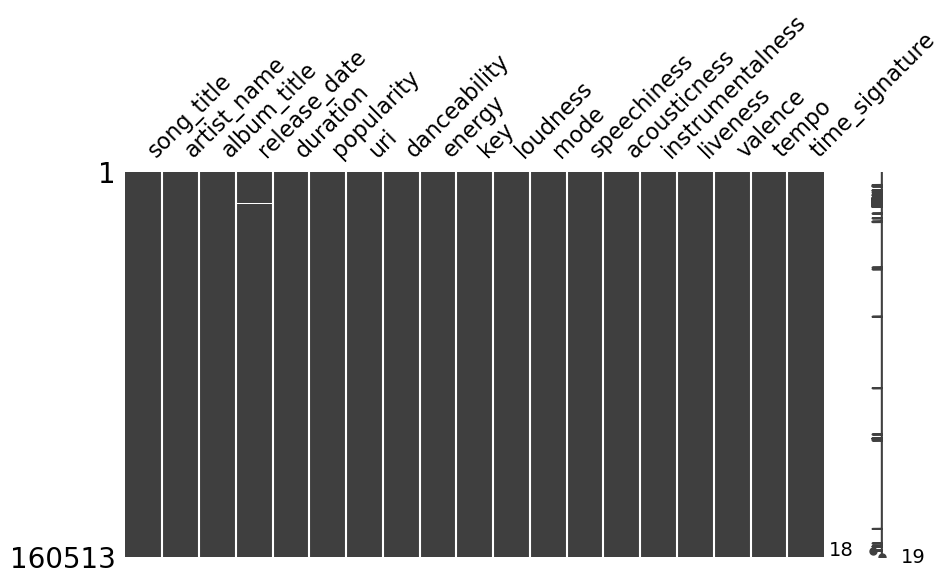

In [8]:
#  check if there are any null values
msno.matrix(spotify_df, figsize=(10,5))

In [9]:
#  display rows with missing release_date
missing_rows = spotify_df["release_date"].isnull()
spotify_df[missing_rows]

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
5443,In the Shadow of the Valley,,,None,187000,0,spotify:local:::In+the+Shadow+of+the+Valley:187,0.718,0.665,8,-10.369,1,0.1010,0.917000,0.000675,0.1100,0.751,79.725,4
5844,April Sweatpants,,,None,166000,0,spotify:local:::April+Sweatpants:166,0.563,0.663,1,-7.800,0,0.0337,0.043000,0.000000,0.1210,0.703,200.015,4
6002,Gee (Korean Ver. MP3 only),SNSD,,None,205000,0,spotify:local:SNSD::Gee+%28Korean+Ver.+MP3+onl...,0.467,0.495,2,-15.455,0,0.0516,0.161000,0.017100,0.0714,0.448,146.016,4
6003,Hero,,,None,194000,0,spotify:local:::Hero:194,0.576,0.579,6,-9.628,1,0.0769,0.160000,0.000000,0.0777,0.947,106.978,4
6008,Beneath the Mask [With Lyrics] - Persona 5,,,None,285000,0,spotify:local:::Beneath+the+Mask+%5BWith+Lyric...,0.663,0.735,8,-5.933,1,0.0275,0.000194,0.025500,0.0954,0.418,114.018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156239,Turning Japanese,The Vapors,The 80's Pop Culture Box - Disc 1,None,224000,0,spotify:local:The+Vapors:The+80%27s+Pop+Cultur...,0.524,0.559,5,-8.319,1,0.0298,0.185000,0.000059,0.1400,0.202,140.043,4
156240,Walk Like An Egyptian,Bangles,The 80's Pop Culture Box - Disc 7,None,204000,0,spotify:local:Bangles:The+80%27s+Pop+Culture+B...,0.716,0.828,11,-13.065,1,0.1040,0.011700,0.000002,0.3010,0.771,103.155,4
156245,In The Sun,Blondie,Summer & Sun,None,160000,0,spotify:local:Blondie:Summer+%26+Sun:In+The+Su...,0.796,0.970,1,-5.193,0,0.0371,0.007390,0.195000,0.6660,0.961,130.002,4
156258,Dear Prudence (Single),Siouxsie & the Banshees,The Best of Siouxsie and The Banshees,None,229000,0,spotify:local:Siouxsie+%26+the+Banshees:The+Be...,0.928,0.531,5,-6.520,0,0.1610,0.096900,0.314000,0.1600,0.765,109.963,4


There are null values in the release_date column: around <b>130</b> missing values.

### Checking for duplicated values

In [10]:
#  checking if there are duplicated entries
#  using URI column since it contains unique values
spotify_duplicated = spotify_df.duplicated(subset=["uri"])
spotify_duplicated_num = spotify_duplicated.sum()
spotify_total = spotify_df.shape[0]
spotify_duplicated_percent = (spotify_duplicated_num / spotify_total) * 100
print(f"{spotify_duplicated_percent: .2f}% ({spotify_duplicated_num} of {spotify_total}) of the spotify dataset are duplicated entries.")

#  display duplicated entries
spotify_df[spotify_duplicated]

 28.53% (45787 of 160513) of the spotify dataset are duplicated entries.


,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1200,Have You Ever Seen The Rain,Creedence Clearwater Revival,Pendulum (Expanded Edition),1970-12-07,160133,84,spotify:track:2LawezPeJhN4AWuSB0GtAU,0.741,0.697,0,-7.028,1,0.0277,0.0664,0.000023,0.1330,0.774,116.109,4
1330,Payphone - Edit,Maroon 5,Overexposed (Deluxe),2012-01-01,231373,48,spotify:track:5cy3CNTBZbX8vZUIsu4p7K,0.741,0.783,4,-4.791,1,0.0415,0.0150,0.000000,0.3020,0.534,110.002,4
1380,She Will Be Loved - Radio Mix,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,259453,79,spotify:track:4llK75pXNWZz6KAho2Gp16,0.651,0.663,0,-5.569,0,0.0281,0.2280,0.000000,0.0994,0.465,102.000,4
1544,Too Good At Goodbyes,Sam Smith,The Thrill Of It All (Special Edition),2017-11-03,201000,76,spotify:track:3VlbOrM6nYPprVvzBZllE5,0.681,0.372,5,-8.237,1,0.0432,0.6400,0.000000,0.1690,0.476,91.873,4
1651,Take Back Home Girl (Feat. Tori Kelly),Chris Lane,Take Back Home,2017-12-08,211426,0,spotify:track:4fv0mLkB3wY4Z2GAG1mWAN,0.494,0.796,11,-3.968,1,0.0738,0.3810,0.000000,0.0918,0.646,159.926,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160487,Who'll Stop The Rain,Creedence Clearwater Revival,Chronicle: 20 Greatest Hits,1976-01-01,148333,49,spotify:track:4hqhLTbu0YtJVIdMs5ysPK,0.689,0.898,11,-4.704,1,0.0791,0.1890,0.766000,0.0770,0.626,90.970,4
160493,"The Downeaster ""Alexa""",Billy Joel,The Bridge/Storm Front/The Nylon Curtain(3 Pak),1982,223266,0,spotify:track:3BKN4JADczZGEul1wkTqUX,0.539,0.648,10,-8.265,0,0.0664,0.0148,0.000010,0.1070,0.676,167.997,4
160499,Here Comes the Rain Again - Remastered Version,Eurythmics,Boxed,2005-11-11,294586,42,spotify:track:5vYhr2kgOonJtWeJq5qZzU,0.669,0.389,0,-11.547,1,0.0306,0.6050,0.160000,0.0905,0.649,130.015,4
160505,Storm Coming,Gnarls Barkley,St. Elsewhere,2006-05-02,188160,31,spotify:track:0afDVuVu6iMIhU2zQ5lfPF,0.730,0.762,11,-5.383,1,0.3220,0.0169,0.074900,0.1970,0.744,79.069,4


### Unique values in the dataset

In [11]:
#  counting how many unique values each column has
for col in spotify_df.columns:
    unique_col_count = spotify_df[col].nunique()
    print(f"{col}: {unique_col_count} unique values")

song_title: 91342 unique values
artist_name: 35193 unique values
album_title: 69065 unique values
release_date: 9153 unique values
duration: 58187 unique values
popularity: 100 unique values
uri: 114726 unique values
danceability: 1291 unique values
energy: 2500 unique values
key: 12 unique values
loudness: 24649 unique values
mode: 2 unique values
speechiness: 1573 unique values
acousticness: 4720 unique values
instrumentalness: 5387 unique values
liveness: 1721 unique values
valence: 1979 unique values
tempo: 58498 unique values
time_signature: 5 unique values


In [12]:
#  identifying categorical values from each column that is identified as categorical
#  but do not have a huge amount of unique values; in other words, they act like labels
select_categorical = ["key",
                      "mode",
                      "time_signature"
                      ]

for categ_col in select_categorical:
    uniq_val = sorted(spotify_df[categ_col].unique())
    print(f"{categ_col} : {uniq_val}")

key : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mode : [0, 1]
time_signature : [0, 1, 3, 4, 5]


 **Equivalent categories**

 *Key*

| value | pitch class (key) |
|-----|-------------|
| 0 | C (also B♯, Ddouble flat) |
| 1 | C♯, D♭ (also Bdouble sharp) |
| 2 | D (also Cdouble sharp, Edouble flat) |
| 3 | D♯, E♭ (also Fdouble flat) |
| 4 | E (also Ddouble sharp, F♭) |
| 5 | F (also E♯, Gdouble flat) |
| 6 | F♯, G♭ (also Edouble sharp) |
| 7 | G (also Fdouble sharp, Adouble flat) |
| 8 | G♯, A♭ |
| 9 | A (also Gdouble sharp, Bdouble flat) |
| 10 | A♯, B♭ (also Cdouble flat) |
| 11 | B (also Adouble sharp, C♭) |


*Mode*

| value | mode |
|-------|------|
| 0 | minor |
| 1 | major |

*Time Signature*

| value | time signature |
|-------|----------------|
| 0 | 0/4 | 
| 1 | 1/4 |
| 3 | 3/4 |
| 4 | 4/4 |
| 5 | 5/4 |

## Data Cleaning

### Convert release_date column to datetime

In [13]:
#  converting dtype of column to its proper dtype
spotify_clean_df = spotify_df.copy()
spotify_clean_df["release_date"] = pd.to_datetime(spotify_clean_df.loc[:, "release_date"], errors="coerce")

#  verify what dtype the column is
display(spotify_clean_df.dtypes)

#  check number of missing entries 
empty_dates = spotify_clean_df["release_date"].isnull().sum()
print(f"There are now {empty_dates} empty dates though. Previously, it was {missing_rows.sum()}.")

song_title                  object
artist_name                 object
album_title                 object
release_date        datetime64[ns]
duration                     int64
popularity                   int64
uri                         object
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
dtype: object

There are now 255 empty dates though. Previously, it was 130.


### Drop entries with null values

<AxesSubplot:>

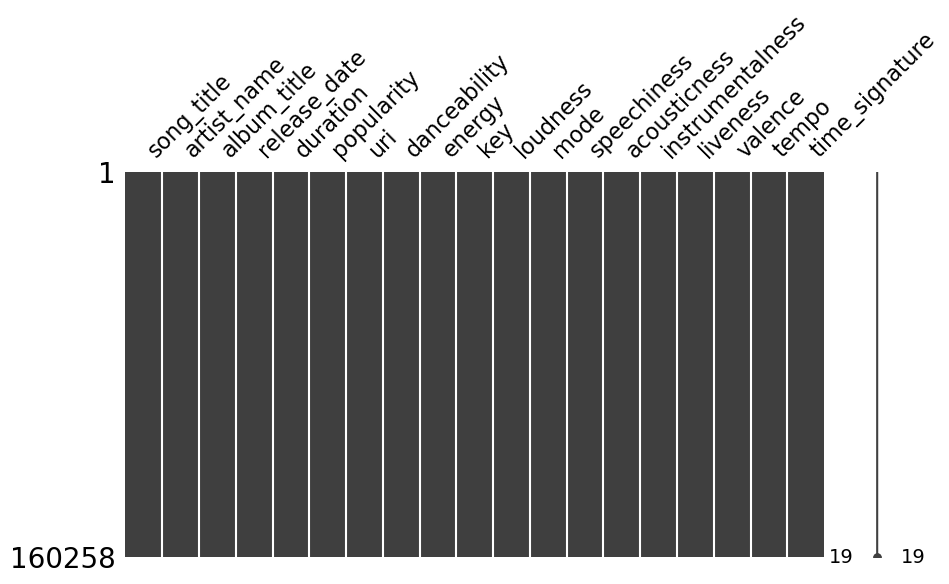

In [14]:
#  dropping rows with empty release dates
spotify_clean_df = spotify_clean_df.dropna(subset=["release_date"])

#  check if there are any null values
msno.matrix(spotify_clean_df, figsize=(10,5))

### Drop duplicated entries

In [15]:
#  dropping duplicate rows 
spotify_clean_df = spotify_clean_df.drop_duplicates(subset=["uri"])
spotify_clean_df

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,222026,57,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.312,0.399,2,-8.506,1,0.0321,0.471000,0.583000,0.130,0.144,126.025,4
1,comedy,Sion,love,2022-07-23,213275,48,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.841,0.367,5,-7.085,1,0.0635,0.869000,0.003400,0.114,0.184,110.046,4
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,383066,44,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.438,0.156,2,-17.311,1,0.0302,0.883000,0.268000,0.105,0.222,85.344,4
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,311100,34,spotify:track:3UG4sW8T05V7raSbLA67o8,0.622,0.730,1,-7.714,1,0.0368,0.018500,0.000426,0.105,0.538,117.036,4
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,181973,53,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.417,0.123,6,-16.572,0,0.0377,0.993000,0.012500,0.143,0.180,137.444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160508,Raincoat,Crash Kings,Crash Kings,2009-01-01,237160,19,spotify:track:4cFfiJCmRfPd9H9p2s5AdT,0.616,0.828,11,-4.736,1,0.1330,0.005780,0.000000,0.352,0.576,123.986,4
160509,Such Sweet Thunder,Delfeayo Marsalis,Sweet Thunder: Duke & Shak,2011-01-18,363566,13,spotify:track:4diUG4YVYzfNL7a3cawE7N,0.689,0.701,8,-5.743,1,0.0667,0.025300,0.000000,0.154,0.463,131.988,4
160510,Rainy Days and Mondays,Pat Metheny,What's It All About,2011-06-14,432000,29,spotify:track:1Sv7zdEn0ez8ToEKsPiWWj,0.234,0.865,9,-5.131,1,0.0516,0.000036,0.000532,0.289,0.194,137.107,4
160511,Rain Drops Keep Falling On My Head (Re-Recorde...,B.J. Thomas,Guilty Pleasures (Re-Recorded / Remastered Ver...,2009-10-01,177028,0,spotify:track:1K3jYWWhRk5Gg8lVtEgbhK,0.733,0.899,0,-4.237,1,0.1430,0.004960,0.000047,0.372,0.760,127.086,4


### Data validation

In [16]:
#  Checking if tracks extracted are actually songs rather than audiobook/podcasts
#  Manually checking abberant "albums" that will be removed from the dataset
spotify_clean_df.album_title.value_counts().sample(50).head()

Dance Vault Mixes - Where Love Lives               1
Moonlit and Devious                                1
Spotify Live                                       2
Brasil Popular - José Ribeiro e Alcides Gerardi    1
Premier Hits                                       1
Name: album_title, dtype: int64

In [17]:
#  searching for albums that has the word french in their titles since this seems to be the most common deviant
spotify_clean_df[spotify_clean_df.album_title.str.contains("French")].album_title.value_counts().head()

Learn In Your Car: Verbs 101 French              86
English To French                                51
Learn in Your Car: French Level 1                45
Learn in Your Car: French Level 2                35
French-English Audio Dictionary For Beginners    31
Name: album_title, dtype: int64

In [18]:
deviant_albums = ["Learn In Your Car: Verbs 101 French",
                  "English To French",
                  "Learn in Your Car: French Level 1",
                  "The Velveteen Rabbit",
                  "French-English Audio Dictionary For Beginners",
                  "Learn In Your Car: Verbs 101 French",
                  "English To French",
                  "Learn in Your Car: French Level 1",
                  "Learn in Your Car: French Level 2",
                  "French-English Audio Dictionary For Beginners",
                  "Learn in Your Car: French Level 3",
                  "Learn to Speak French: English-French Phrase and Word Audio Book",
                  "Learn French Words",
                  "VocabuLearn® Word Boosters French",
                  "Speak and Read French, Part 3: French Literature",
                  "Vocabulearn ® French - English Level 3",
                  "Vocabulearn ® French - English Level 2",
                  "Vocabulearn ® French - English Level 1",
                  "Speak and Read French, Vol. 2: Basic and Intermediate",
                  "Speak and Read French, Vol. 1: Basic",
                  "Learn French - Easily, Effectively, and Fluently",
                  "English to French - Useful Phrases",
                  "Learn French Fast",
                  "Learn French Self-Taught - Franz Thimm",
                  "Easy Conversations in French - Gustave Chouquet",
                  "An Interview with Kris Needs",
                  "Civil Rights vs. Social Privilege",
                  "More Ghost Stories by M. R. James",
                  "The Halloween Poetry Collection",
                  ]

deviant_artists = ["Orange",
                   "DBS Audiobooks",
                   "VANTAGE"
                   ]

#  removing the previously listed albums and artists
sans_devalbums = ~spotify_clean_df["album_title"].isin(deviant_albums)
sans_devartists = ~spotify_clean_df["artist_name"].isin(deviant_artists)
spotify_clean_df = spotify_clean_df[sans_devalbums]
spotify_clean_df = spotify_clean_df[sans_devartists]
display(spotify_clean_df.sample(5))
print(f"Current total entries: {spotify_clean_df.shape[0]} from {spotify_df.shape[0]}")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11592\1528431073.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spotify_clean_df = spotify_clean_df[sans_devartists]


,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
89704,When I Called Your Name,Twisted Pine,Twisted Pine,2017-07-14,252428,35,spotify:track:6SZ1bNDsPyDeEaIq9cosxw,0.944,0.4770,6,-7.331,0,0.3300,0.00311,0.000068,0.1090,0.737,127.965,4
97982,Silver Bells,Maurice Hofer,At Christmas,2020-10-16,163500,37,spotify:track:2fKI4IRNIk0CzTtd0rcgCB,0.366,0.0161,5,-27.355,1,0.0632,0.99200,0.951000,0.1100,0.171,49.668,4
117187,Tesão Da Madrugada - Ao Vivo,George Henrique & Rodrigo,Ao Vivo Em Brasília,2022-02-11,173375,74,spotify:track:4grGI2vFnknrfmHT1JOVFU,0.593,0.4650,3,-8.474,0,0.0440,0.75000,0.000000,0.1280,0.351,126.118,3
98470,Stå med mig i regnet - Spotify Studio It's Hit...,Newkid,Stå med mig i regnet - Spotify Studio It's Hit...,2022-09-16,234603,62,spotify:track:5TFJLlEljmmlxS3s58oQN8,0.777,0.6580,0,-5.191,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,4
9639,Free Fall,ILLENIUM,Awake,2017-09-21,205970,52,spotify:track:4ZAerT2NicBmzZ4VkpmWEn,0.286,0.6350,0,-9.833,0,0.0393,0.01430,0.000080,0.2710,0.255,139.996,4


Current total entries: 113947 from 160513


<h2> Checking for normality </h2>

Statistical tests used to analyze data require assumptions for the results to be valid.  

In [19]:
kstest(spotify_clean_df["popularity"], 'norm')

KstestResult(statistic=0.8253853385257167, pvalue=0.0)

Not normally distributted. We do not need to remove more observations even though the data is not normally distributed since this assumption is not necessary for Principal Component Analysis

In [20]:
spotify_clean_df.to_csv('datacleaned1.csv', sep='\t', encoding='utf-8', header='true')

<h1> Data Analysis </h1>

- EDA
- Principal Component Analysis

<h3> Exploratory Data Analysis </h3>

<h4> Correlation </h4>

| Absolute Value of Coefficient Correlation | Strength of Linear Relationship |
|-------------------------------------------|---------------------------------|
|0-0.2|Very Weak|
|0.2-0.4|Weak|
|0.4-0.6|Moderate|
|0.6-0.8|Strong|
|0.8-1.0|Very Strong|

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11592\2596031898.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(spotify_clean_df.corr(), dtype=np.bool))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11592\2596031898.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(spotify_clean_df.corr(), dtype=np.bool))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11592\2596031898.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr i

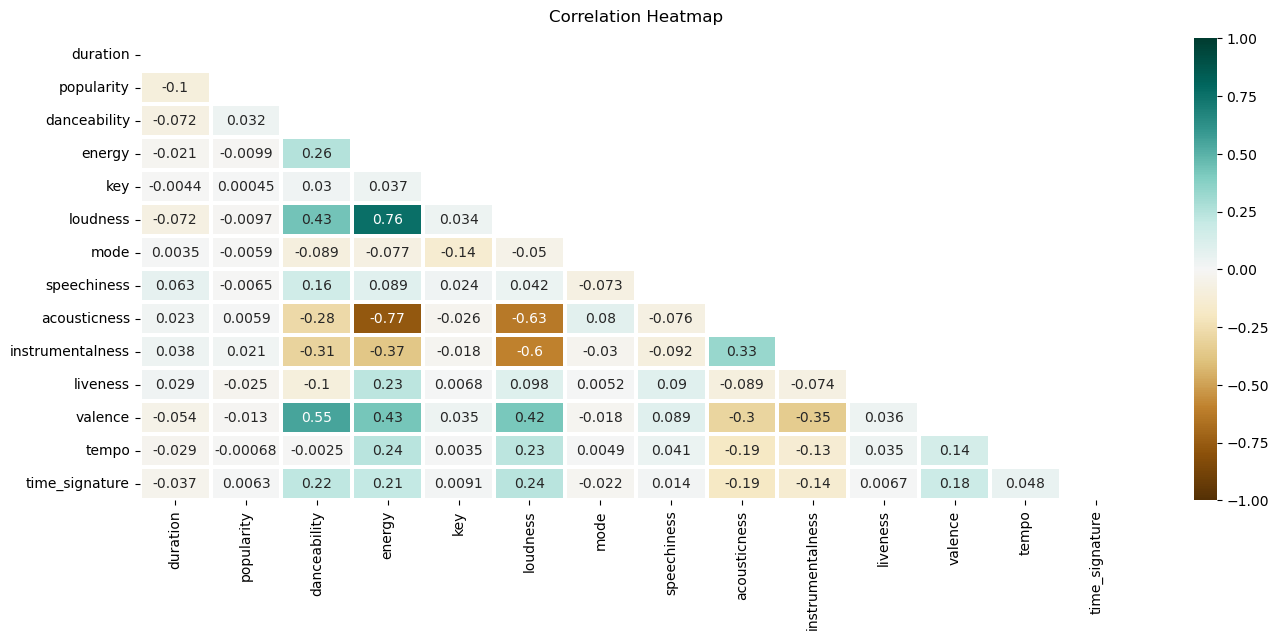

In [21]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(spotify_clean_df.corr(), dtype=np.bool))
heatmap=sns.heatmap(spotify_clean_df.corr(),mask=mask, vmin=-1,vmax=1,annot=True, cmap='BrBG', linewidths=1.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<h4> Strong to Very Strong Correlation </h4> <break>

- loudness & energy
- acousticcness & energy
- acousticness & loudness
- instrumentalness & loudness

In [22]:
# get a sample dataframe
sample_df=spotify_clean_df.sample(int(0.004*len(spotify_clean_df)))

In [23]:
print(len(sample_df))

455


[Text(0.5, 1.0, 'Instrumentalness vs Loudness Correlation')]

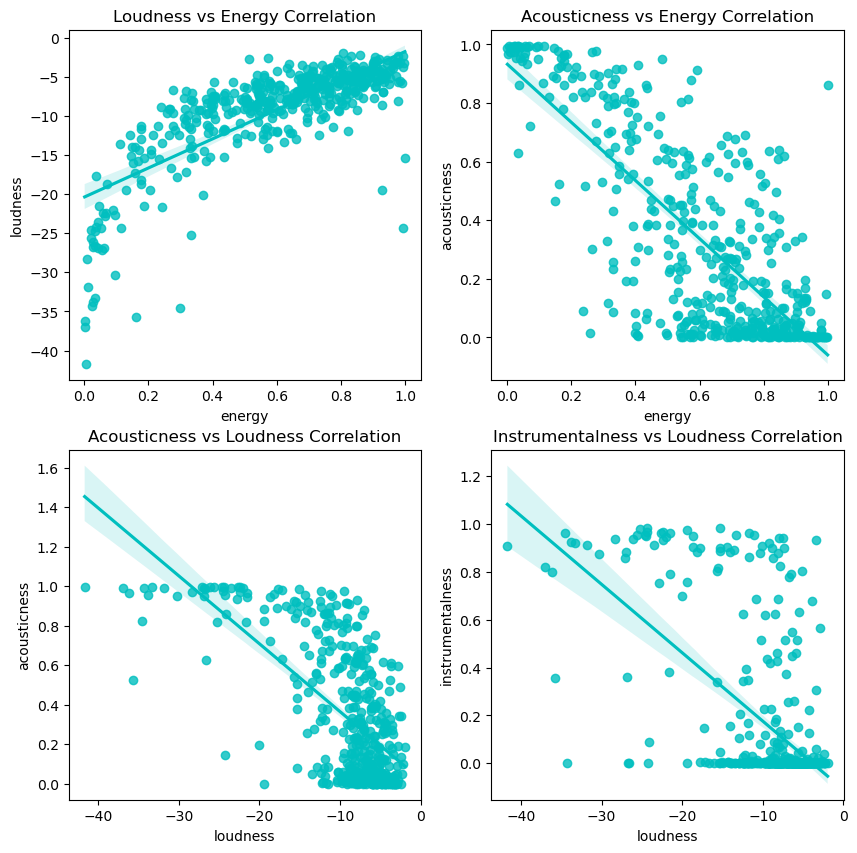

In [25]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.regplot(data=sample_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation")

plt.subplot(2,2,2)
sns.regplot(data=sample_df, y="acousticness", x="energy", color="c").set(title="Acousticness vs Energy Correlation")

plt.subplot(2,2,3)
sns.regplot(data=sample_df, y="acousticness", x="loudness", color="c").set(title="Acousticness vs Loudness Correlation")

plt.subplot(2,2,4)
sns.regplot(data=sample_df, y="instrumentalness", x="loudness", color="c").set(title="Instrumentalness vs Loudness Correlation")


As the energy increases, the loudness also increases. other graphs follows

In [1]:
# converting release_dates to YYYY format
import re
bad_indeces=[] # will drop tracks with year formats that are not one of the following:
 
lst_4_years = [] # YYYY formats
lst_2_slash = [] # MM/DD/YY formats
lst_2_hyphen = [] # YYYY-MM formats

lst_year_release = [] # to store years converted to standardized format YYYY

for i, date in enumerate(spotify_clean_df.release_date):

    if len(date)==4: # keep YYYY as is
        lst_4_years.append(date)
        lst_year_release.append(date)
        
    elif re.findall(r"(.){1,2}[/](.){1,2}[/](.){1,2}",date): # convert MM/DD/YY
        lst_2_slash.append(date)
        
        if int(date[-2:]) < 19: # for years 2000 to 2018
            lst_year_release.append("20"+(date[-2:]))
        else:
            lst_year_release.append("19"+(date[-2:])) # for years 1939 (oldest year) to 1999
        
    elif re.findall(r"(.){4}-(.){2}",date): # convert YYYY-MM
        lst_2_hyphen.append(date)
        lst_year_release.append(date[:4])
        
    else:
        bad_indices.append((i, date))
        
print(len(bad_indices)) # there are no bad indices :) that means all release dates were in one of the above 3 formats
playlists["release_year"] = lst_year_release


NameError: name 'spotify_clean_df' is not defined